Notebook 3, Module 1, Data and Data Management, CAS Applied Data Science, 2020-08-21, S. Haug, University of Bern. 

# 3. Data acquisition on the world wide web

**Learning outcomes:**

Participants will be able to collect data from www sources. Examples are provided and exercised. We have about 1.5h hours for this tutorial.

**Table of Contents**
- 3.1 Read json from the web
- 3.2 Retrieve and display pictures and files from the web
- 3.3 Scraping webpages (html scraping)
- 3.4 Cron jobs and Scheduled tasks
- Some notes and links concerning social media

**Further sources**
- Examples all over internet
- A book: https://www.packtpub.com/big-data-and-business-intelligence/mastering-social-media-mining-python


## Summary of data visualization:
- Plotting Guidelines:
    - Axis labelling with units
    - Labelling of graphs
    - Legend below ("Fig 1: Aaretemperatur in 2020")
- Plot types:
    - Histograms / Frequency plots (probability density distribution)
    - Scatter plots (relationship between two variables)
    - Box plots (good summary of the distribution of the data since it usually includes median, confidence intervals, etc.)
- Effect of binning:
    - Overbinning (Resolution is too high and I don't have enough data in each bin which might lead to a misinterpretation of the data. It might look like there are statistical fluctuations where in fact there aren't any).
    - Underbinning (Resolutions isn't high enough and you might miss important information)
- Ideally you plot error bars (especially in a scientific context) in order to judge what are fluctuations and what aren't.
- Modules for plotting in python
    - mathplotlib
    - seaborn

## 3.1 Analyse Aare with data from https://aareguru.existenz.ch/



Get the data from website, bring it into a format which can be imported into a dataframe, plot the time series and the histograms.

In [11]:
from urllib.request import urlopen
import pandas as pd
startlink = "https://aareguru.existenz.ch/v2018/current"
f = urlopen(startlink)
l = str(f.read())
l=l.split('[')[3].split(']')
l='['+l[0]+']'
#print(l)
df = pd.read_json(l)
df


,timestamp,flow,temperature
0,2020-08-19 13:00:00,203,19.83
1,2020-08-19 13:10:00,202,19.87
2,2020-08-19 13:20:00,201,19.90
3,2020-08-19 13:30:00,200,19.94
4,2020-08-19 13:40:00,199,19.98
...,...,...,...
260,2020-08-21 11:50:00,164,21.08
261,2020-08-21 12:20:00,165,21.20
262,2020-08-21 12:30:00,165,21.24
263,2020-08-21 12:40:00,165,21.28


In [61]:
from urllib.request import urlopen
import pandas as pd
import json
startlink = "https://aareguru.existenz.ch/v2018/current"
g = urlopen(startlink)
m = str(g.read())
json

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
df.describe()

,flow,temperature
count,264.000000,264.000000
mean,178.265152,19.969129
std,11.384306,0.533804
min,156.000000,19.240000
25%,167.000000,19.395000
50%,182.000000,20.030000
75%,184.250000,20.265000
max,204.000000,21.240000


In [12]:
# We want the timestamp as index for plotting
dft = df.copy()
dft = dft.set_index('timestamp')
dft.tail()
#dft.head()

,flow,temperature
timestamp,,
2020-08-21 11:50:00,164,21.08
2020-08-21 12:20:00,165,21.20
2020-08-21 12:30:00,165,21.24
2020-08-21 12:40:00,165,21.28
2020-08-21 12:50:00,165,21.31


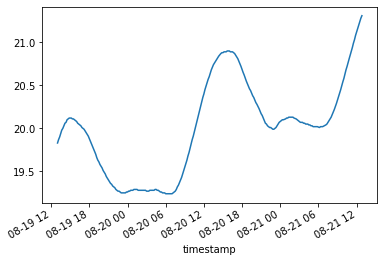

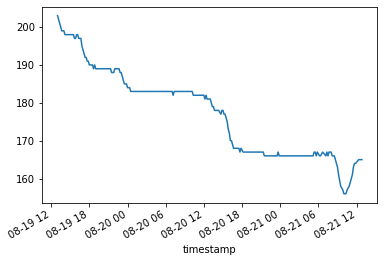

In [13]:
import matplotlib.pyplot as plt
dft['temperature'].plot()
plt.show()
dft['flow'].plot()

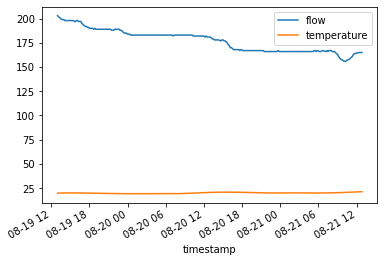

In [16]:
dft.plot()



**Possible further exercise or project for Module 1 and 2**

Find some colleague who can get the historical data (knows how to use the API) out of https://aareguru.existenz.ch/. Bring all data into one data frame. Look for correlations, averages (per month, per year ...). Combine the data with weather data, e.g. the wind on the Thun lake. For the Model 2 project, try to make a linear regression model predicting the Aare temperature. 

## 3.2 Get pictures (or files) from webpages

Get 10 pictures from a webserver with the Image module and show it directly.

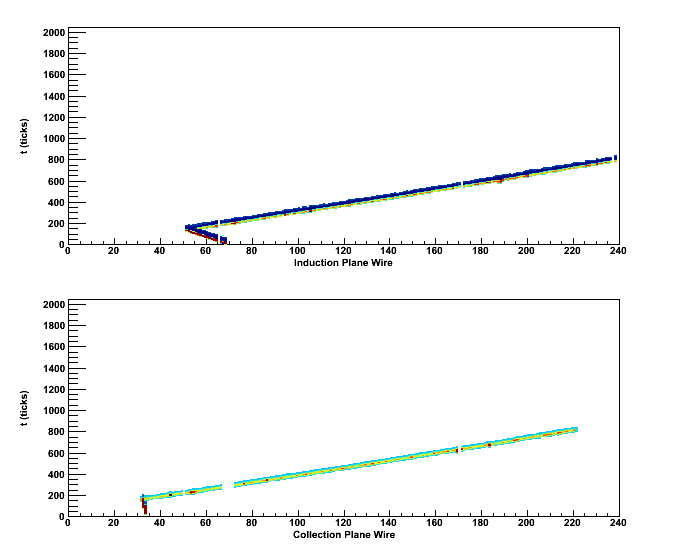

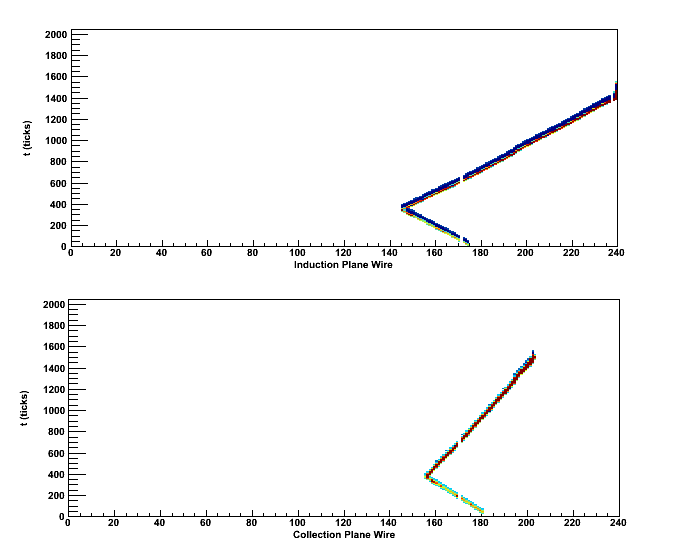

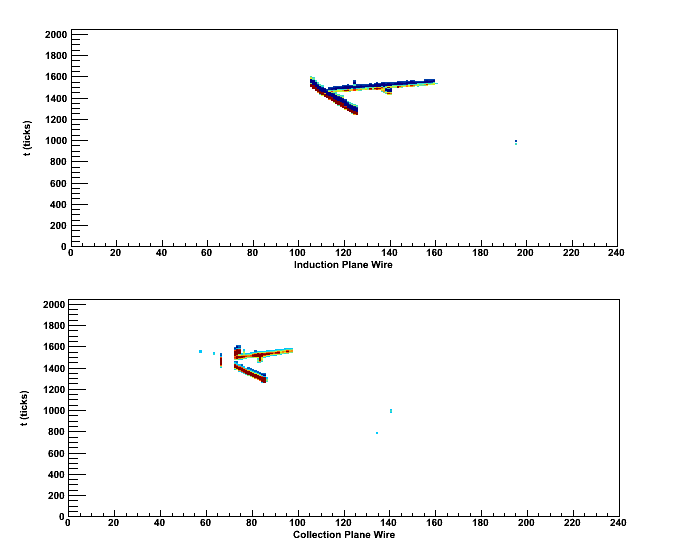

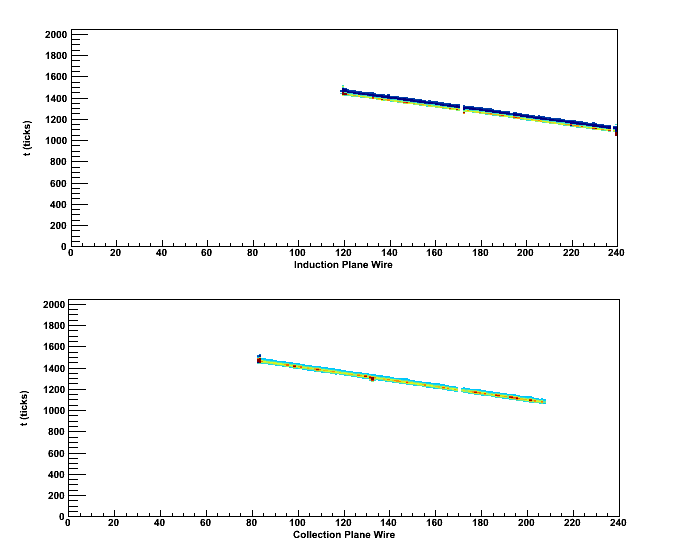

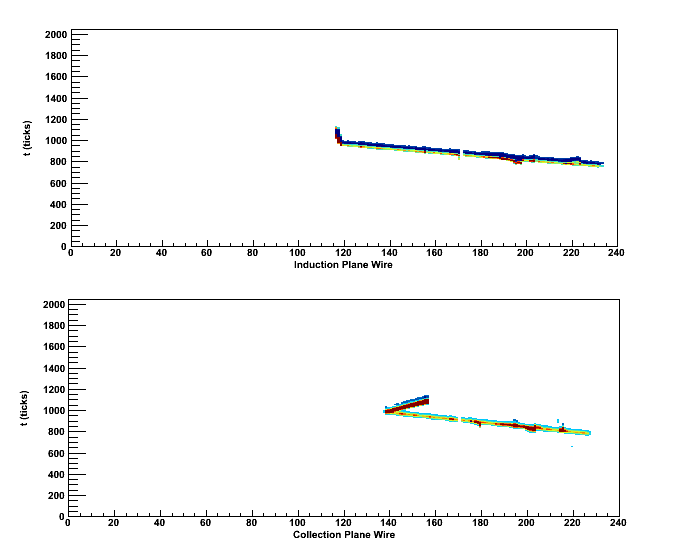

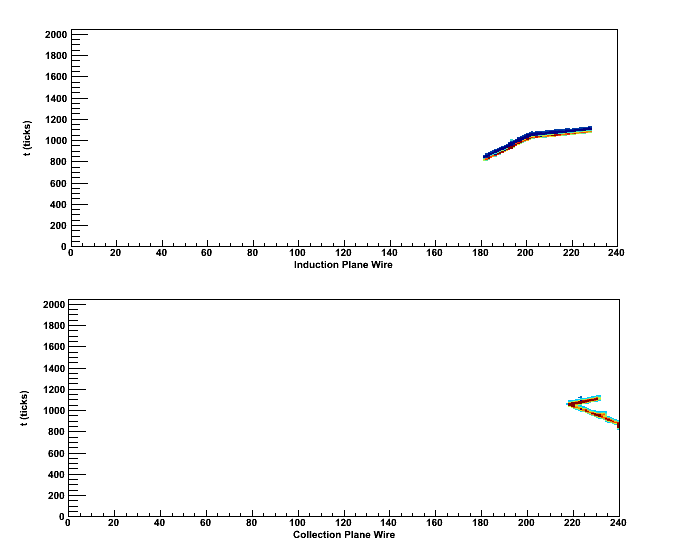

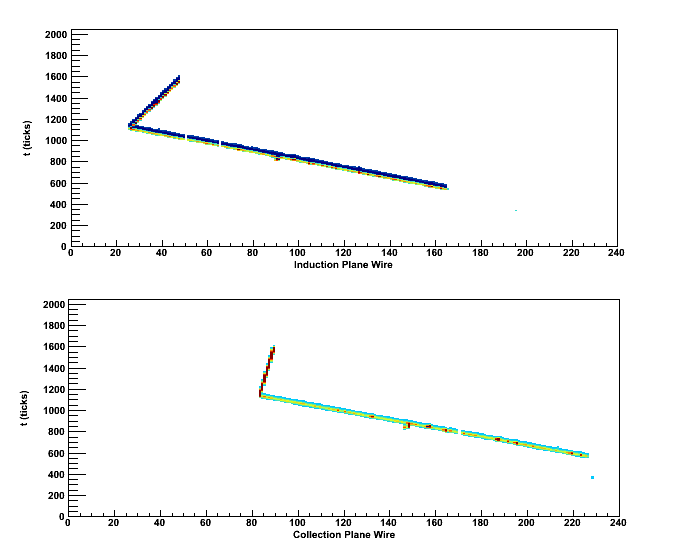

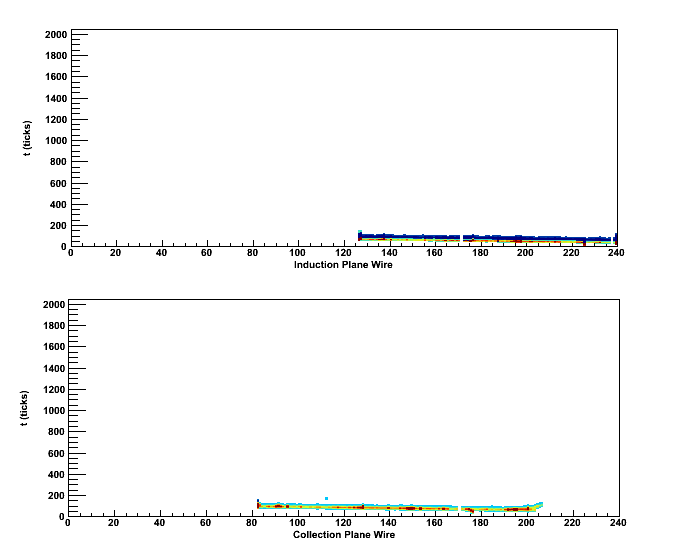

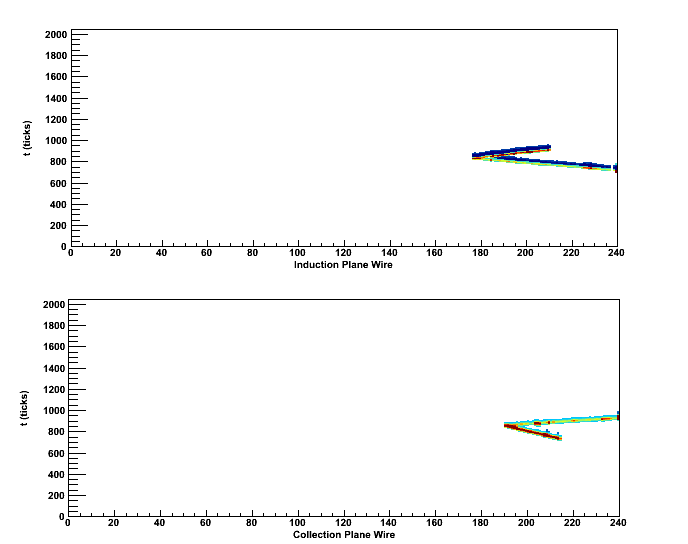

In [19]:
from IPython.display import Image as image
from IPython.display import display

for i in range(1,10): 
    url = 'https://fl-5-232.zhdk.cloud.switch.ch/evd.planeview.00001.00000000'+str(i)+'.png'
    img = image(url)
    display(img)

Download a file into the current directory (for further processing). In this exmple we downloud a file with tweets from the present US president. Then we load it into a dataframe for some analysis.

In [20]:
import pandas as pd
import urllib
fname="https://fl-5-232.zhdk.cloud.switch.ch/t-tweets.txt"
# retrieve that file and save it as t-tweets.txt
urllib.request.urlretrieve(fname,'t-tweets.txt')
#It has a json format, so we import it with the read_json method
df = pd.read_json('t-tweets.txt')
df.head()


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @TomFitton: Biggest story anti-@realDonaldT...,2019-08-23 03:54:18+00:00,3494,0,1.0,1164747665898442752
1,Twitter for iPhone,RT @OliverMcGee: Wow. Throwback to when Senato...,2019-08-19 03:25:20+00:00,89347,0,1.0,1163290824815329280
2,Twitter for iPhone,"Go out and get Andrew McCarthy’s new book, “Ba...",2019-08-15 12:26:47+00:00,19778,80596,0.0,1161977535946731520
3,Twitter for iPhone,“Did George Bush ever condemn President Obama ...,2019-08-06 10:47:43+00:00,35488,119017,0.0,1158691113047416832
4,Twitter for iPhone,The cages for kids were built by the Obama Adm...,2019-08-01 01:46:29+00:00,36433,133466,0.0,1156742970105892864


In [30]:
#do the same as above however without saving it as a .txt file
import pandas as pd
import urllib
tweets=urllib.request.urlopen("https://fl-5-232.zhdk.cloud.switch.ch/t-tweets.txt")
x=str(tweets.read())
x

'b\'[{"source":"Twitter for iPhone","text":"RT @TomFitton: Biggest story anti-@realDonaldTrump media is hiding: Obama FBI/DOJ, and State Dept colluded with Bruce Ohr, his wife, and Cl\\xe2\\x80\\xa6","created_at":"Fri Aug 23 03:54:18 +0000 2019","retweet_count":3494,"favorite_count":0,"is_retweet":true,"id_str":"1164747665898442754"},{"source":"Twitter for iPhone","text":"RT @OliverMcGee: Wow. Throwback to when Senator Barack Obama agreed with @realDonaldTrump on immigration! RT this so your friends see this!\\xe2\\x80\\xa6","created_at":"Mon Aug 19 03:25:20 +0000 2019","retweet_count":89347,"favorite_count":0,"is_retweet":true,"id_str":"1163290824815329281"},{"source":"Twitter for iPhone","text":"Go out and get Andrew McCarthy\\xe2\\x80\\x99s new book, \\xe2\\x80\\x9cBall of Collusion.\\xe2\\x80\\x9d \\xe2\\x80\\x9cSupervision became the investigator, and when they pushed the envelope, there was nobody there to tell them NO. It goes right to the President (Obama). Plenty of informatio

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   source          245 non-null    object             
 1   text            245 non-null    object             
 2   created_at      245 non-null    datetime64[ns, UTC]
 3   retweet_count   245 non-null    int64              
 4   favorite_count  245 non-null    int64              
 5   is_retweet      242 non-null    float64            
 6   id_str          245 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 13.5+ KB


Let's check how often Obama was mentioned in these 245 tweets.

In [ ]:
counter=0
txt = df['text']
for i in range(0,len(txt)):
    if 'Obama' in txt[i]: counter+=1
print(counter)

(Yes, these are prefiltered tweets about Obama)

## 3.3 Scrape Webpages (html scraping)

There are several billion online websites. With python you can easily read and parse this data if you have the links. Since pages are linked, one can in principle unnest probably all internet for webpages. 

In Python there is a library https://www.crummy.com/software/BeautifulSoup/bs4/doc/ for pulling data out of html and xml pages. We don't practise that library here, however, if you at some point deal with a lot of html, you may want to use it.

Here we get the links on the landing page of Science IT Suport, and if there are any, the mail addresses. 
 

In [32]:
from urllib.request import urlopen
import pandas as pd

#startlink = "http://www.scits.unibe.ch"
startlink = "http://www.scits.unibe.ch/about_us/contact/"
f = urlopen(startlink)
myfile = f.read()
lines = str(myfile).split(' ')
links = []
addresses = []
for line in lines:
    if 'http' in line:
        links.append(line)
    elif '@' in line:
        #print(line)
        addresses.append(line)
df_links = pd.DataFrame(links,columns=['Links'])
df_addrs = pd.DataFrame(addresses,columns=['Adresses'])
df_addrs

,Adresses
0,"content=""@unibern"""
1,"src=""//www.scits.unibe.ch/media/logo_unibern@2..."
2,"list,&nbsp;scits-info@math.unibe.ch,"
3,"itemprop=""email"">g&#x75;&#105;&#x6c;l&#x61;u&#..."
4,"itemprop=""email"">&#x6d;&#121;k&#104;&#x61;&#10..."
5,"itemprop=""email"">g&#x73;&#99;iac&#x63;&#97;@lh..."
6,"itemprop=""email"">r&#97;h&#101;&#108;&#x2e;&#x6..."


The above code is not optimal as you have probably seen. Lets use regular expressions instead (from StackOverflow). Regular expressions are a bit geeky, but very powerful and great fun. If you don't wan't to learn them, you mostly find the expression you want by googling. 

In [36]:
import re # the regular expression module
startlink = "http://www.scits.unibe.ch/about_us/contact/"
f = urlopen(startlink)
html = f.read()
# Extract email addresses
reobj = re.compile(r"\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,6}\b", re.IGNORECASE)
print(re.findall(reobj, html.decode('utf-8')))
# Extract urls (links)
urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', html.decode('utf-8'))
print(urls)

['logo_unibern@2x.png', 'scits-info@math.unibe.ch']
['http://ogp.me', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.scits.unibe.ch', 'https://www.suche.unibe.ch', 'http://schema.org', 'http://cmsrelaunch.unibe.ch', 'https://listserv.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch', 'http://schema.org', 'https://www.scits.unibe.ch

### Tables from webpages

If you or someone else pubslishes data in html tables, it can be collected with pandas quite easily, actually directly without using the urllib module.

In [37]:
import pandas as pd
link = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
tables = pd.read_html(link)
df = tables[0]
df.head()

,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source
0,1,China[b],1404077480,NaN,21 Aug 2020,National population clock[3]
1,2,India[c],1366213527,NaN,21 Aug 2020,National population clock[4]
2,3,United States[d],330166286,NaN,21 Aug 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan[e],220892331,NaN,1 Jul 2020,UN Projection[2]


In which countries are the people consuming the most energy?

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              241 non-null    object
 1   Country (or dependent territory)  242 non-null    object
 2   Population                        242 non-null    int64 
 3   % of worldpopulation              1 non-null      object
 4   Date                              242 non-null    object
 5   Source                            242 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.5+ KB


In [39]:
s_df = df.iloc[1:,1:2] 
s_df['consum'] = df.iloc[1:,7].astype('float')
s_df.sort_values('consum', ascending=False)

IndexError: single positional indexer is out-of-bounds

In [40]:
s_df['consum'].plot(kind='hist',bins=50,range=(1000,50000))

KeyError: 'consum'

## 3.4 Run cron jobs (linux) / scheduled tasks (windows)

If you need to collect data on a regular basis you typically run a so-called cron job on a Linux machine or a scheduled task on a Windows machine. For example, you can specify when and how often your Python data acquisition script should run. Maybe you would like to collect new Aare data every day. Of course, your computer has to be running and connected to internet at the scheduled time.

Here an example collecting Aare data. You can creae a python script aarecollect.py with a text editor. The code can be:

In [41]:
import urllib
import datetime
link = "https://aareguru.existenz.ch/v2018/current"
filename = 'aare-data-'+ str(datetime.date.today()) +'.json'
urllib.request.urlretrieve(link,filename)



('aare-data-2020-08-21.json', <http.client.HTTPMessage at 0x1fe17db18b0>)

You can run this script from the command line by typing "python aarecollect.py"

On Linux you specify when to execute this file and how often in the so called crontab. On Windows by configuring a Scheduled Task. Google instructions if you need to do this. For example, this file can be added to a users crontab by typing "crontab ~/tmp/mycron.sh" on the command line, mycron.sh being this file:

In [42]:
>cat ~/tmp/mycron.sh
# Run aarecollect every day at 1am by default
0 1 * * * cd ~/tmp && ./python aarecollect.py


SyntaxError: invalid syntax (<ipython-input-42-4aebf7bea522>, line 1)

### Possible exercise

Hier a nice little challenge for you. Use the code above (together with a for loop or two) to scrape all webpages of your employer company for public available email addresses and put them into a dataframe :) (of course you could scrape all internet now, but we don't go that far today).

In [54]:
# Write, copy and paste your code here
import re # the regular expression module
startlink = "https://www.bucherer.com/ch/en"
f = urlopen(startlink)
html = f.read()

# Extract urls (links)
urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', html.decode('utf-8'))
for i in urls:
    x = urlopen(i)
    y = x.read()
    urls = urls + re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', y.decode('utf-8'))
    
for url in urls:   
    if 'https://www.bucherer' in url:
           reobj = re.compile(r"\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,6}\b", re.IGNORECASE)
        
print(re.findall(reobj, html.decode('utf-8'))) 
    

HTTPError: HTTP Error 400: Bad Request

## Some notes and links concerning social Media

### 1. Google search

There is are APIs for doing google searches from Python. Hier is one explained. 

https://stackoverflow.com/questions/37083058/programmatically-searching-google-in-python-using-custom-search
 

### 2. Twitter

Twitter generates about 500M tweets per day. Thus, data mining on twitter can be interesting.

Note: there are rate limits in the use of the Twitter API, as well as limitations in case you want to provide a downloadable data-set, see:

https://dev.twitter.com/overview/terms/agreement-and-policy

https://dev.twitter.com/rest/public/rate-limiting

Tweepy is one python module with clients for thwe Twitter API. 

- https://www.tweepy.org/


### 3. Instagram

Largest photo sharing social media platform with 500 million monthly active users, and 95 million pictures and videos uploaded on Instagram daily in 2018 (?). 

https://stackoverflow.com/questions/61010431/how-to-start-with-the-instagramapi-in-python